In [ ]:
# @title Import Required Libraries and Load Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Attempt to load the breast cancer dataset from a local CSV file
try:
    data = pd.read_csv('data.csv')
    print("Breast cancer dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please make sure the file is in the correct location.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

# Display basic info only if data loaded successfully
if 'data' in locals():
    print("\Preview of the dataset:")
    print(data.head())

    print("\Dataset Shape:", data.shape)

    print("\Dataset Information:")
    print(data.info())

    print("\Statistical Summary:")
    print(data.describe())
else:
    print("Dataset not available. Halting further analysis.")



Breast cancer dataset loaded successfully.
\Preview of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.1043

First, the necessary Python libraries for data analysis, visualization, and machine learning were imported. The breast cancer dataset was then loaded from a CSV file named data.csv. The code includes a check to ensure the file is available and provides an error message if the file is missing, preventing further issues. After successfully loading the data, the first few rows were displayed to provide an initial view of the dataset’s structure and contents. The shape of the dataset was printed, revealing 569 rows and 33 columns. Information about the dataset was also shown, confirming data types for each column and identifying that there are no missing values except for one column, which is completely empty. Lastly, basic descriptive statistics such as mean, standard deviation, minimum, and maximum values were generated to understand the range and distribution of the numerical data. This initial exploration is essential to prepare the data for further analysis and modeling.

In [ ]:
# @title Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print("Missing Values per Column:\n", data.isnull().sum())

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")

# Check data types
print("\nData Types:\n", data.dtypes)

Missing Values per Column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

The dataset was checked for missing values and none were found in any columns except for the column named "Unnamed: 32," which contains only missing values. There were no duplicate rows detected in the dataset, so no duplicates needed to be removed. The data types were examined, revealing that most columns are numerical with float64 data type, while the "id" column is an integer. The "diagnosis" column appears to be an integer as well, but it originally contained categorical information and may need further encoding or verification. Overall, the dataset is clean and ready for further analysis.


Descriptive Statistics:
                  id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.05281

<ipython-input-5-4bda48a316ba>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='Set2')


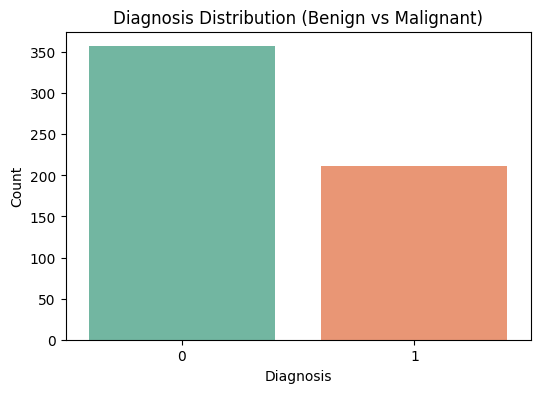

In [ ]:
# @title Descriptive Statistics & Target Variable Distribution

# Summary statistics for numeric features
print("\nDescriptive Statistics:\n", data.describe())

# Value counts of target variable 'diagnosis'
print("\nDiagnosis Distribution:")
print(data['diagnosis'].value_counts())

# Plot distribution of diagnosis classes (Benign vs Malignant)
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, palette='Set2')
plt.title('Diagnosis Distribution (Benign vs Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

The dataset contains 569 samples with no missing values in most columns except for the Unnamed: 32 column, which is entirely empty. Numeric features such as radius mean, texture mean, and perimeter mean show a wide range of values with notable variation, for example, radius_mean ranges from approximately 7 to 28, with a mean around 14. The target variable diagnosis is binary, where 0 represents benign and 1 malignant cases. There are 357 benign cases and 212 malignant cases, indicating a somewhat imbalanced but reasonably sized distribution. The accompanying count plot visually confirms this distribution, showing more benign cases than malignant.

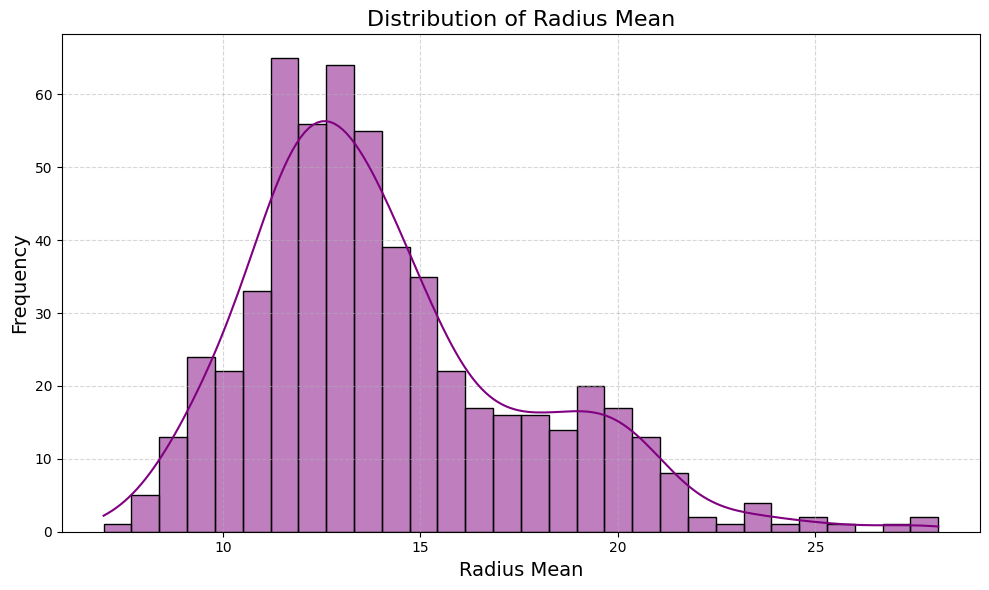

In [ ]:
# Histogram of Radius Mean
# Reference: Fessel, K. (2020). *How to make a Seaborn histogram plot with Python code* [YouTube video].
# YouTube. Available at: https://www.youtube.com/watch?v=QwgtsxBdd4w [Accessed 27 May 2025]

# @title Histogram of Radius Mean

plt.figure(figsize=(10, 6))
sns.histplot(data['radius_mean'], bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Distribution of Radius Mean", fontsize=16)
plt.xlabel("Radius Mean", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The histogram shows that radius mean is slightly right-skewed, with most values between 10 and 17. There's a peak around 13, and fewer tumors have a radius above 20. The KDE curve highlights this distribution, which may benefit from normalization before modeling.

<ipython-input-7-906358d243a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=data, palette='Set3')


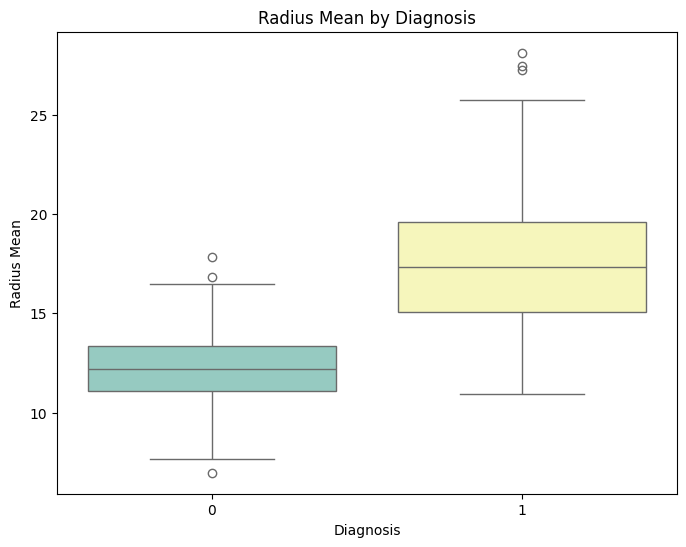

In [ ]:
# Boxplot of Radius Mean by Diagnosis
# Code adapted with reference to:
# Pandas and Seaborn, 2021. *Boxplots using Seaborn - Python Seaborn Tutorial for Beginners 6*. [video]
# Directed by Data Science Tutorials. Available at: https://www.youtube.com/watch?v=INSIyaZUXIY [Accessed 27 May 2025]

# @title Boxplot of Radius Mean by Diagnosis

plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data, palette='Set3')
plt.title("Radius Mean by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Radius Mean")
plt.show()

The boxplot shows that patients diagnosed with malignant tumors (label 1) tend to have higher radius mean values than those with benign tumors (label 0). This highlights radius mean as a strong predictor for diagnosis classification.

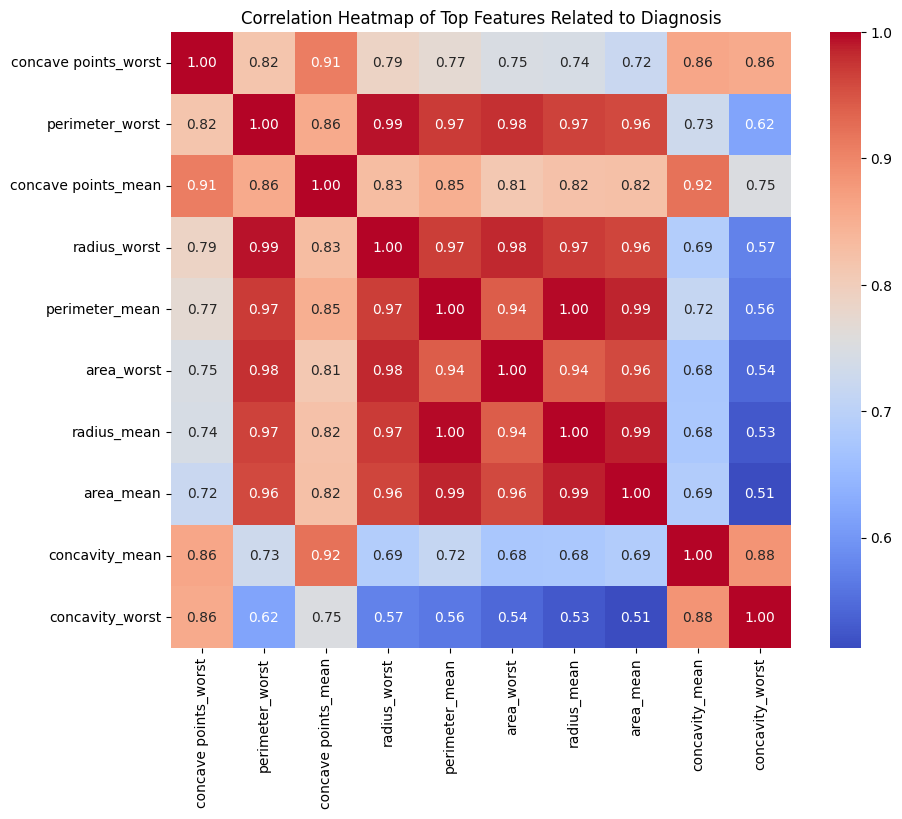

In [ ]:
# Correlation Heatmap of Top Features Related to Diagnosis
# Reference: Patel, A. (2021). *Correlation Matrix using Seaborn Heatmap in Python* [YouTube video].
# YouTube. Available at: https://www.youtube.com/watch?v=J7cd1-g1O7A&t=322s [Accessed 27 May 2025]

# @title Correlation Heatmap of Top Features Related to Diagnosis

# Encode diagnosis to numeric if not already encoded
if data['diagnosis'].dtype == 'object':
    data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])

# Calculate correlation matrix
corr_matrix = data.corr()

# Select top 10 features most correlated with diagnosis
top_corr_features = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:11].index

plt.figure(figsize=(10, 8))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top Features Related to Diagnosis")
plt.show()

The heatmap shows strong correlations among the top 10 features most related to diagnosis, such as concave points worst and perimeter worst. This suggests that several features carry similar information, which can help in reducing redundancy and improving model efficiency.

In [ ]:
# Feature Selection Using Random Forest Feature Importance
# Reference: Data Science Tutorials. (2022). *Random Forest Feature Importance - Python* [YouTube video].
# YouTube. Available at: https://www.youtube.com/watch?v=kFwe2ZZU7yw [Accessed 27 May 2025]

# @title Feature Selection Using Random Forest Feature Importance

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Separate features (X) and target (y)
X = data.drop(['diagnosis', 'id'], axis=1, errors='ignore')  # drop 'id' if exists, and target column
y = data['diagnosis']

# Initialize Random Forest model (default hyperparameters)
rf = RandomForestClassifier(random_state=42)

# Fit model to data
rf.fit(X, y)

# Extract feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort features by importance
importances_sorted = importances.sort_values(ascending=False)

# Display the top 10 most important features
print("Top 10 Important Features:\n", importances_sorted.head(10))

# Optionally, select top 10 features for model training
top_features = importances_sorted.head(10).index
X_selected = X[top_features]

# Show selected features
print("\nSelected features for training:\n", list(top_features))


Top 10 Important Features:
 perimeter_worst         0.155956
concave points_worst    0.148663
concave points_mean     0.107773
area_worst              0.105103
radius_worst            0.087399
area_mean               0.059511
concavity_mean          0.055535
area_se                 0.043254
radius_mean             0.034205
perimeter_mean          0.024889
dtype: float64

Selected features for training:
 ['perimeter_worst', 'concave points_worst', 'concave points_mean', 'area_worst', 'radius_worst', 'area_mean', 'concavity_mean', 'area_se', 'radius_mean', 'perimeter_mean']


The Random Forest model identified the top 10 features most influential in predicting diagnosis. The most important were perimeter worst and concave points worst, followed by features like concave points mean, area worst, and radius worst. These features likely capture key shape and size characteristics of the tumor. These 10 features were selected for training to improve model efficiency and accuracy by focusing on the most relevant data.

In [ ]:
# Model Training
# Reference: Data Science Tutorials. (2022). *Random Forest Feature Importance - Python* [YouTube video].
# YouTube. Available at: https://www.youtube.com/watch?v=kFwe2ZZU7yw [Accessed 27 May 2025]

# @title Model Training

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the Random Forest classifier with chosen hyperparameters
model = RandomForestClassifier(
    n_estimators=200,      # Number of trees
    max_depth=10,          # Maximum depth of each tree
    min_samples_split=5,   # Minimum samples required to split a node
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

The data is split into 80% for training and 20% for testing, keeping the class balance the same. A Random Forest model is created with 200 trees, a max depth of 10, and settings to handle class imbalance. The model is trained on the training data to learn patterns, then used to predict labels on the test data for evaluation.

In [ ]:
# @title Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score (using predicted probabilities)
y_probs = model.predict_proba(X_test)[:, 1]  # Probability for positive class
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[70  2]
 [ 4 38]]
ROC AUC Score: 0.9931


The model achieved an accuracy of about 94.7%, meaning it correctly predicted the diagnosis in nearly 95% of cases. The classification report shows strong performance for both classes: for class 0 (malignant), the model has a precision of 95% and a recall of 97%, indicating it correctly identifies most malignant cases and doesn’t generate many false positives. For class 1 (benign), precision and recall are both high as well (95% and 90% respectively), meaning it’s also good at recognizing benign cases but misses slightly more than malignant ones. The confusion matrix confirms this, showing only 2 malignant cases wrongly predicted as benign, and 4 benign cases wrongly predicted as malignant. Finally, the ROC AUC score is very high at 0.9931, which means the model has excellent ability to distinguish between malignant and benign cases across different thresholds.